In [ ]:
import pandas as pd  
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/table_1 (2).csv')
df2 = pd.read_csv('/content/table_2 (2).csv')

PART1: ANALYSIS ON TABLE 1

Region wise analysis to find the most and least performing regions

In [ ]:
df1['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [ ]:
df1.shape

(149, 20)

In [ ]:
df2.shape

(1949, 14)

In [ ]:
df2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,NaN,NaN,NaN
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,NaN,NaN,NaN
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,NaN,NaN,NaN
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,NaN,NaN,NaN
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,NaN,NaN,NaN


In [ ]:
df2[df2['Country name']=='Afghanistan'].describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.0,0.0,0.0
mean,2013.500000,3.594667,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500,NaN,NaN,NaN
std,3.605551,0.740986,0.102589,0.040962,0.747035,0.112022,0.120532,0.078817,0.095395,0.078098,NaN,NaN,NaN
min,2008.000000,2.375000,7.370000,0.420000,50.800000,0.374000,-0.121000,0.707000,0.351000,0.237000,NaN,NaN,NaN
25%,2010.750000,3.021750,7.640250,0.489250,51.840000,0.418750,0.008000,0.788750,0.512500,0.267750,NaN,NaN,NaN
50%,2013.500000,3.753500,7.697000,0.521000,52.480000,0.516000,0.092000,0.860500,0.559500,0.307000,NaN,NaN,NaN
75%,2016.250000,4.042250,7.702750,0.531500,52.820000,0.583500,0.163500,0.892500,0.612750,0.372000,NaN,NaN,NaN
max,2019.000000,4.758000,7.725000,0.559000,53.200000,0.718000,0.236000,0.954000,0.710000,0.502000,NaN,NaN,NaN


In [ ]:
#Q3
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
 11  Unnamed: 11                       0 non-null      float64
 12  Unname

In [ ]:
df1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

 * Why was ladder score in dystopia dropped?

 The given feature has one constant value throughout the data set which does not help in our study i.e. with change in other features, Ladder score in dystopia remains same.

In [ ]:
df1.drop(['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual' ], axis='columns', inplace=True)

In [ ]:
df1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
df2.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [ ]:
df2.drop(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis= 'columns', inplace = True)

In [ ]:
df2_new = ['country_name', 'year', 'life_ladder', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy_birth',
       'freedom_life_choices', 'generosity',
       'perception_corruption', 'positive_affect', 'negative_affect']
df2.columns = df2_new

* Data Cleaning - 
  1. Detecting the null values
  2. Replacing null values with their country's specific mean(of that feature).

In [ ]:
df2['gdp_per_capita'].isnull().value_counts()

False    1913
True       36
Name: gdp_per_capita, dtype: int64

In [ ]:
df_mean = df2.groupby(['country_name']).mean()
df_mean.head()
df_mean.shape
df2.shape

(1949, 11)

In [ ]:
df2.isnull().sum()

country_name                       0
year                               0
life_ladder                        0
gdp_per_capita                    36
social_support                    13
healthy_life_expectancy_birth     55
freedom_life_choices              32
generosity                        89
perception_corruption            110
positive_affect                   22
negative_affect                   16
dtype: int64

In [ ]:
df2.shape

(1949, 11)

*   The remove_null function fills mean values of the given attribute based on the country it is part of.

In [ ]:
def remove_null(col_name):
  n = df2[col_name].isnull()
  for i in range(1949):
    if n[i]:
      country = df2.at[i, 'country_name']
      df2.at[i, col_name] = df_mean.at[country, col_name]

In [ ]:
for i in df2.columns:
  remove_null(i)

In [ ]:
df2.isnull().sum()

country_name                      0
year                              0
life_ladder                       0
gdp_per_capita                   19
social_support                    1
healthy_life_expectancy_birth    36
freedom_life_choices              0
generosity                       19
perception_corruption            28
positive_affect                   2
negative_affect                   1
dtype: int64

On applying the remove_null function, there are still null values that remain. This is because the given attribute has all null values for the country. Hence we cannot find the mean.

* We drop the countries whose healthy_life_expectancy mean is null. This results in 87% null values removal.

In [ ]:
n = df2['healthy_life_expectancy_birth'].isnull()
for i in range(1949):
    if n[i]:
        df2.drop([i], inplace = True)

In [ ]:
df2.drop(['perception_corruption', 'generosity'], axis ='columns', inplace=True)

More than 90% null values are removed

In [ ]:
df2.isnull().sum()

country_name                     0
year                             0
life_ladder                      0
gdp_per_capita                   8
social_support                   1
healthy_life_expectancy_birth    0
freedom_life_choices             0
positive_affect                  2
negative_affect                  1
dtype: int64

In [ ]:
df2[df2['country_name']=='Bahrain']

,country_name,year,life_ladder,gdp_per_capita,social_support,healthy_life_expectancy_birth,freedom_life_choices,positive_affect,negative_affect
107,Bahrain,2009,5.701,10.709,0.9040,65.94,0.8960,0.7640,0.4220
108,Bahrain,2010,5.937,10.706,0.8770,66.30,0.8620,0.6850,0.4230
109,Bahrain,2011,4.824,10.696,0.9080,66.58,0.8700,0.5440,0.5140
110,Bahrain,2012,5.027,10.716,0.9110,66.86,0.6820,0.5890,0.3810
111,Bahrain,2013,6.690,10.757,0.8840,67.14,0.8090,0.7680,0.3060
112,Bahrain,2014,6.165,10.783,0.8802,67.42,0.8616,0.7219,0.3536
113,Bahrain,2015,6.007,10.785,0.8530,67.70,0.8500,0.7160,0.3030
114,Bahrain,2016,6.170,10.781,0.8630,68.10,0.8890,0.7870,0.2830
115,Bahrain,2017,6.227,10.771,0.8760,68.50,0.9060,0.8140,0.2900
116,Bahrain,2019,7.098,10.715,0.8780,69.30,0.9070,0.7620,0.3170


* Number of countries in every region

In [ ]:
df_new1 = df1.groupby('Regional indicator')['Country name'].count()
df_new1

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: Country name, dtype: int64

* We observe that the Sub-Saharan Africa has the highest number of countries(24.2%).
Western Europe, Latin America and Caribbean are having the next set of highest country count(total-27.5%).


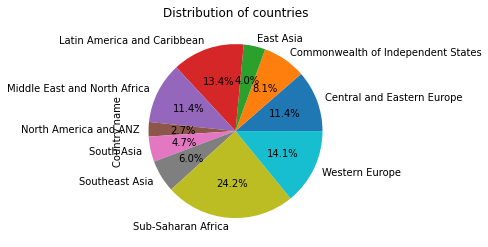

In [ ]:

df_new1.plot.pie(autopct = '%1.1f%%')
plt.title('Distribution of countries')
plt.show()

In [ ]:
df_new2 = df1.groupby('Regional indicator')['Perceptions of corruption'].mean()

In [ ]:
df_new2

Regional indicator
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: Perceptions of corruption, dtype: float64

df1 has no null values

In [ ]:
df1.isnull().sum()

Country name                      0
Regional indicator                0
Ladder score                      0
Standard error of ladder score    0
upperwhisker                      0
lowerwhisker                      0
Logged GDP per capita             0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         0
dtype: int64

* Renaming the attribute names and dropping irrelevant columns

In [ ]:
df1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
df1.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker'], axis= 'columns', inplace = True)

In [ ]:
df1_new = ['country_name', 'regional_indicator', 'life_ladder', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_life_choices', 'generosity',
       'perception_corruption']
df1.columns = df1_new

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 10

* Life ladder is a measure the satisfaction of a person(on the scale 1-10)
The pie chart gives an understanding of how regions contribute to this measure throughout the world.

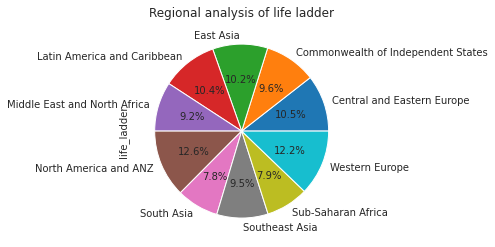

In [ ]:
t1 = df1.groupby('regional_indicator')['life_ladder'].mean()

t1.plot.pie(autopct = '%1.1f%%')
plt.title('Regional analysis of life ladder')
plt.show()


* Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period 

* From the below Pie chart the Sub Saharan Africa and Western Europe contribute to gross gdp per capita with around 37%. From previous studies it is observed that these regions have 62% higher country count compared to other regions in the world. Also the cumulative life ladder shares upto 20% in the world.





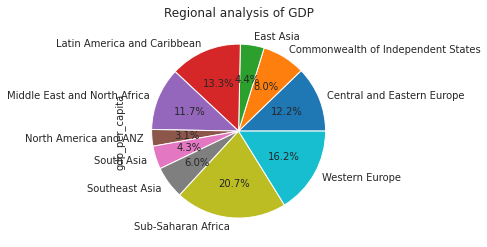

In [ ]:
t2 = df1.groupby('regional_indicator')['gdp_per_capita'].sum()
t2.plot.pie(autopct = '%1.1f%%')
plt.title('Regional analysis of GDP')
plt.show()

The bar_func inputs the attribute names. Calculates the attribute mean for all regional indicators and presents it as a bar graph.

In [ ]:
def bar_func(col_name):
  t4 = df1.groupby('regional_indicator')[col_name].mean().sort_values()
  l1 = list(t4.keys())
  l2 = list(t4.values)
  fig = px.bar(x=l1, y=l2, title=col_name, height=500, width=500)
  fig.show()

We plot four bar plots to study the regions.
Steady increase in all bar graph oberved.<br>
1.Social Support: 

*   The people of North America and ANZ, Western Europe feel the most supportive socially.
*   Sub Saharan Africa and Sout Asia feel the least supported amongs the public.


2.Health Life Expectancy:  

*   The people of North America and ANZ, Western Europe remain healtheir for a longer duration in their life. As as a result their total life ladder contributes to 25% in the world. Also on studying the correlation plot, we infer that the correlation between the two feature is around 0.9 which explains the fact higher the working years of a person the more satisfied he is.
*   Sub Saharan Africa have the least health life expectancy.

3. Freedom of life choices:

*   The people of North America and ANZ and south east asia are more independent in making their life decisions which further reflects in the regions confidence and social as well as financial success.
* Sub Saharan Africa, Middle east and North Africa do not experience the the same freedom of independent decision making.

4. Generosity:

Southeast Asia, North America and ANZ dedicate their time and money to add value to the needfull people.
*   Southeast Asia, North America and ANZ dedicate their time and money to add value to the needfull people.
*    The generosity measure of Middle east and North Africa, Central and Eastern Europe are the lowest. This explains that the willingness to add value to the society in any possible form is not encourged in these regions

5. Perception of Corruption:


*   As per the data The Central and Eastern Europe, South Asia are the most corrupted in terms of politics as well as private exploitation.
*   Whereas regions like North America and ANZ, Western Europe  have controlled their corruptions levels which will definitely reflects in freedom and growth of the people.





In [ ]:
bar_func('social_support')
bar_func('healthy_life_expectancy')
bar_func('freedom_life_choices')
bar_func('generosity')
bar_func('perception_corruption')
bar_func('life_ladder')

* We scale certain features in our data set for more inferrable data visualization. 
Social_support, Freedom_life_choices, generosity, perception_corruption are the features scales by 10 units.

In [ ]:
def scaling(col_name):
  for i in range(149):
    df1.at[i, col_name] = df1.at[i, col_name]*10

  

In [ ]:
scaling('social_support')
scaling('freedom_life_choices')
scaling('generosity')
scaling('perception_corruption')

Text(0.5, 0, '')

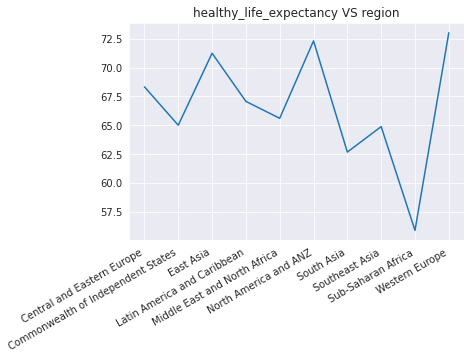

In [ ]:
t = df1.groupby('regional_indicator').mean()

plt.xticks(rotation = 30, ha='right')
plt.plot(t.index, t['healthy_life_expectancy'])
plt.title('healthy_life_expectancy VS region')
plt.xlabel('')

* On analyzing the multiple line graphs, we can observe Life ladder, gdp per capita, social support, generosity and freedom of life choices go hand in hand i.e. the values are highly correlated. The reason behind the correlation lies in the fact that these features measure positive temperaments in the population. The satisfaction of people (life ladder) living in the region is an outcome of how socially supported and independent they are. Also higher the health life expectancy, the more they have been healthy towards their life which will reflect in the gdp of the country as well as the life ladder.
The generosity .i.e the kindness and willingness measure also reflects the in the gdp measures. 
Also, if the gdp is high, there is a higher chance of people being generous as they have money to give and open mindedness.
We see a huge dip in the perception of corru[tion line for anz, as it is a negative measure, the lesser corrupt the region is, the higher the positive numbers.


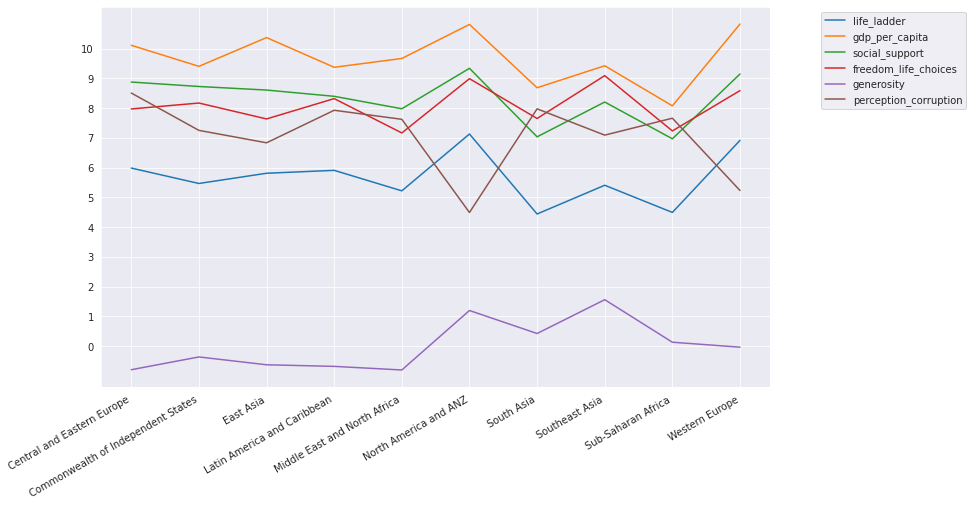

In [ ]:
plt.rcParams['figure.figsize'] = (12,7)
y_ticks = np.arange(0, 11, 1)
plt.xticks(rotation = 30, ha='right')
plt.yticks(y_ticks)
plt.plot(t.index, t['life_ladder'])
plt.plot(t.index, t['gdp_per_capita'])
plt.plot(t.index, t['social_support'])
plt.plot(t.index, t['freedom_life_choices'])
plt.plot(t.index, t['generosity'])
plt.plot(t.index, t['perception_corruption'])
plt.legend(['life_ladder', 'gdp_per_capita', 'social_support', 'freedom_life_choices', 'generosity','perception_corruption'], loc='upper right', bbox_to_anchor=(1.3,1))
                                                                                                                                                                

 * Below given is a heat of the correlation between each other from the table and we can observe in the perception Corruption darker the block higher the rate of corruption

In [ ]:
df1_temp = df1
df1_temp = df1_temp.drop(['country_name', 'regional_indicator'], axis='columns')

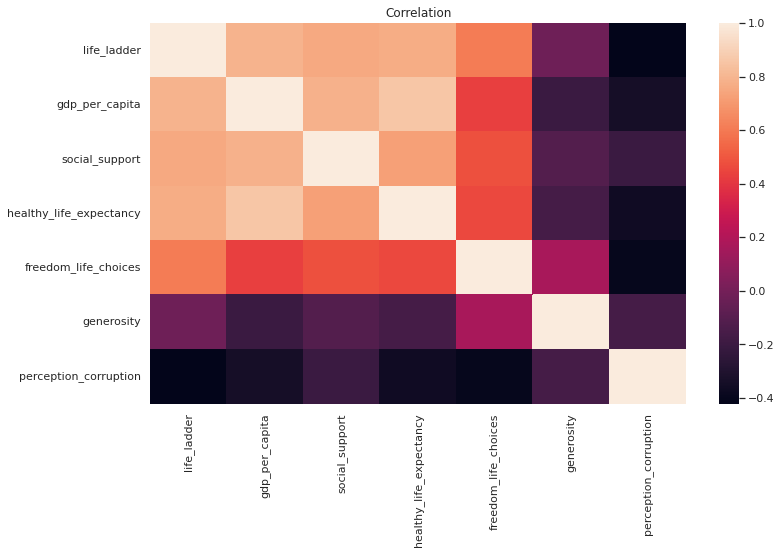

In [ ]:
sns.set()
ax = sns.heatmap(df1_temp.corr())
plt.title("Correlation")
plt.show()

In [ ]:
t5 = df1.groupby('regional_indicator').mean()

In [ ]:
t5

,life_ladder,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption
regional_indicator,,,,,,,
Central and Eastern Europe,5.984765,10.109059,8.874118,68.338412,7.970588,-0.789412,8.505294
Commonwealth of Independent States,5.467000,9.401833,8.725000,65.009500,8.169167,-0.360000,7.250833
East Asia,5.810333,10.367667,8.605000,71.252167,7.635000,-0.623333,6.833333
Latin America and Caribbean,5.908050,9.370000,8.395000,67.076050,8.317500,-0.677000,7.926000
Middle East and North Africa,5.219765,9.666118,7.976471,65.609118,7.164706,-0.797647,7.622353
North America and ANZ,7.128500,10.809500,9.335000,72.325000,8.987500,1.200000,4.492500
South Asia,4.441857,8.682571,7.034286,62.681000,7.650000,0.427143,7.974286
Southeast Asia,5.407556,9.421444,8.203333,64.888444,9.090000,1.563333,7.091111
Sub-Saharan Africa,4.494472,8.075194,6.967500,55.886472,7.231944,0.134444,7.659444


* ANZ is the best performing region in terms of overall high mean value

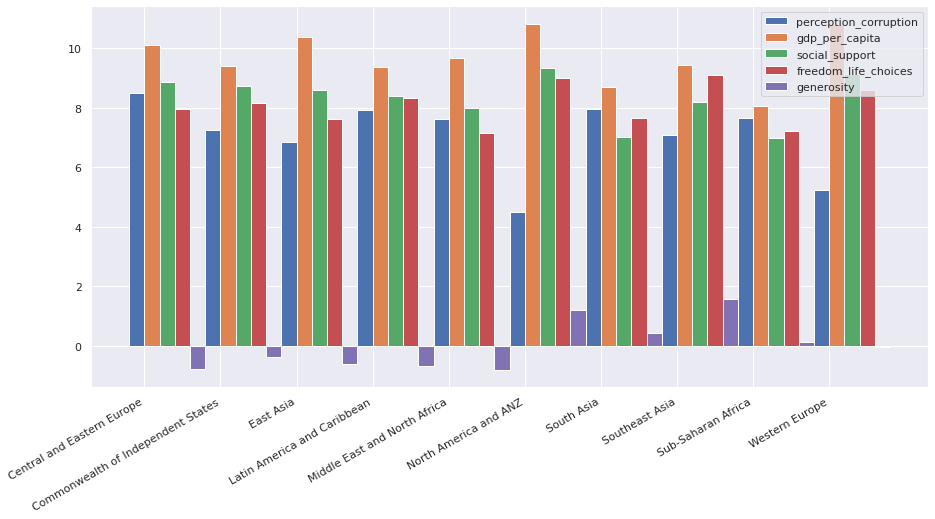

In [ ]:
plt.rcParams['figure.figsize'] = (15,7)
l1 = list(t5.index)
x_axis = np.arange(len(l1))
plt.bar(x_axis - 0.1, t5['perception_corruption'], 0.2, label = 'perception_corruption')
plt.bar(x_axis + 0.1, t5['gdp_per_capita'], 0.2, label = 'gdp_per_capita')
plt.bar(x_axis + 0.3, t5['social_support'], 0.2, label = 'social_support')
plt.bar(x_axis + 0.5, t5['freedom_life_choices'], 0.2, label = 'freedom_life_choices')
plt.bar(x_axis + 0.7, t5['generosity'], 0.2, label = 'generosity')

plt.xticks(rotation = 30, ha='right')
plt.xticks(x_axis, l1)
plt.legend()
plt.show()

According to the bar plots above Sub Saharan Africa underperforms. We analyze the region and infer.
Most countries lie in the region 7.5 to 8.5

In [ ]:
d=df1[df1['regional_indicator']=='Sub-Saharan Africa']

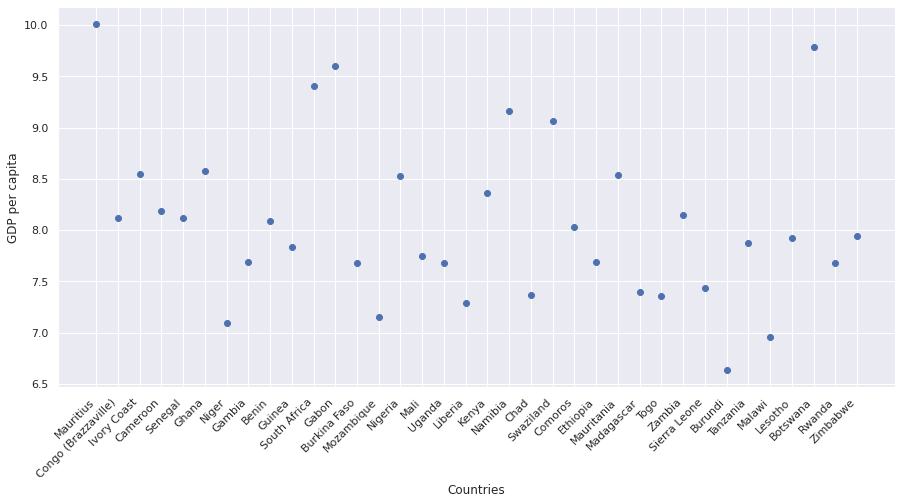

In [ ]:
import matplotlib.pyplot as plt
plt.xticks(rotation = 45, ha='right')
plt.scatter(x=d['country_name'], y=d['gdp_per_capita'])
plt.xlabel("Countries")
plt.ylabel("GDP per capita")
plt.show()

In [ ]:
fig = px.choropleth(d, locationmode='country names', locations='country_name',color='freedom_life_choices',
                       
                    color_continuous_scale=px.colors.sequential.Plasma,
                    )
fig.show()

In [ ]:
d['gdp_per_capita'].mean()

8.075194444444442

In [ ]:
d['freedom_life_choices'].mean()

7.231944444444445

In [ ]:
#find mean of freedom_life_choices, gdp per capita above 8.5

d_mean = d[d['gdp_per_capita']>=9]
print("Sub saharan:", d['freedom_life_choices'].mean())
print("World:", d_mean['freedom_life_choices'].mean())

Sub saharan: 7.231944444444445
World: 7.561666666666667


Hex bin plot

<Figure size 1080x576 with 0 Axes>

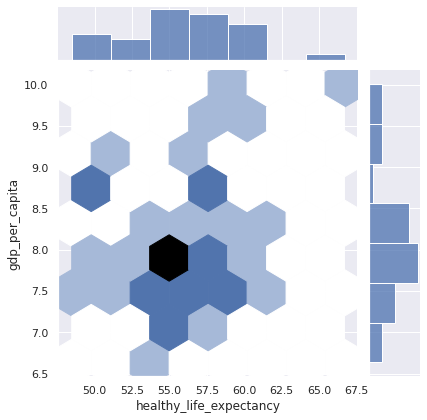

In [ ]:
plt.figure(figsize=(15,8))
sns.jointplot(x="healthy_life_expectancy",y="gdp_per_capita",data=d,kind='hex')
plt.show()

In [ ]:
d1=df1[df1['regional_indicator']=='Western Europe']
d1.drop(columns=['regional_indicator'])

,country_name,life_ladder,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption
0,Finland,7.842,10.775,9.54,72.000,9.49,-0.98,1.86
1,Denmark,7.620,10.933,9.54,72.700,9.46,0.30,1.79
2,Switzerland,7.571,11.117,9.42,74.400,9.19,0.25,2.92
3,Iceland,7.554,10.878,9.83,73.000,9.55,1.60,6.73
4,Netherlands,7.464,10.932,9.42,72.400,9.13,1.75,3.38
5,Norway,7.392,11.053,9.54,73.300,9.60,0.93,2.70
6,Sweden,7.363,10.867,9.34,72.700,9.45,0.86,2.37
7,Luxembourg,7.324,11.647,9.08,72.600,9.07,-0.34,3.86
9,Austria,7.268,10.906,9.34,73.300,9.08,0.42,4.81
12,Germany,7.155,10.873,9.03,72.500,8.75,0.11,4.60


Most dense at 8 and life expectancy 55.
Amount of spread analyzed 

<Figure size 504x1080 with 0 Axes>

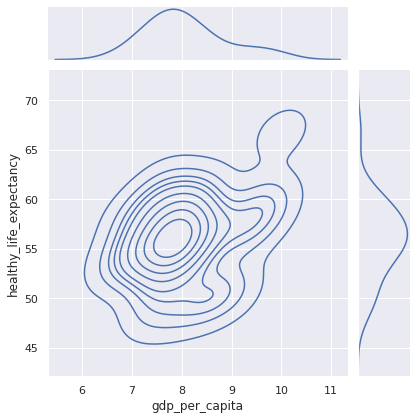

In [ ]:
plt.figure(figsize=(7,15))
sns.jointplot(x="gdp_per_capita",y= "healthy_life_expectancy",kind= "kde",data= d)
plt.show()

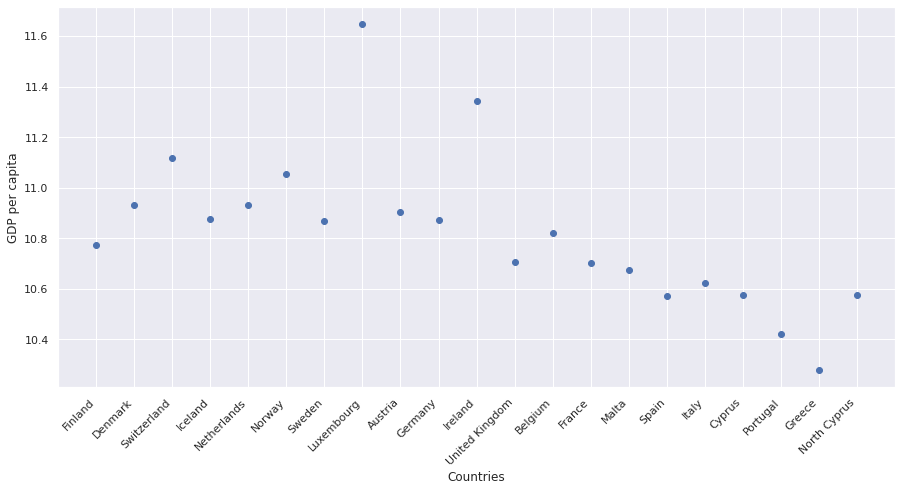

In [ ]:
import matplotlib.pyplot as plt
plt.xticks(rotation = 45, ha='right')
plt.scatter(x=d1['country_name'], y=d1['gdp_per_capita'])
plt.xlabel("Countries")
plt.ylabel("GDP per capita")
plt.show()


In [ ]:
d_anz=df1[df1['regional_indicator']=='North America and ANZ']


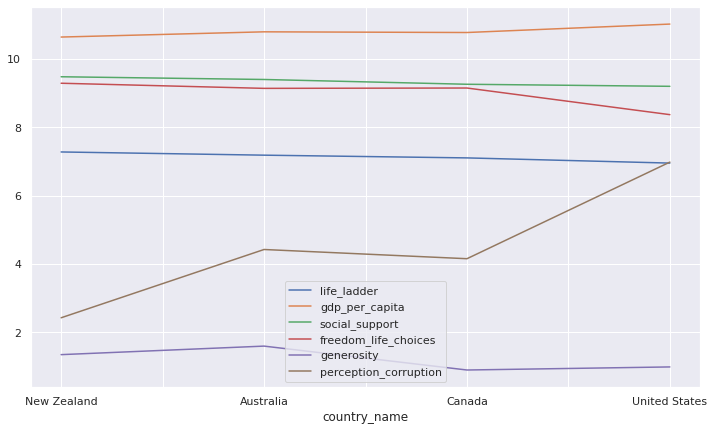

In [ ]:
d_anz.plot(x="country_name", y=["life_ladder","gdp_per_capita","social_support","freedom_life_choices","generosity","perception_corruption"], kind="line",figsize=(12,7))
plt.show()

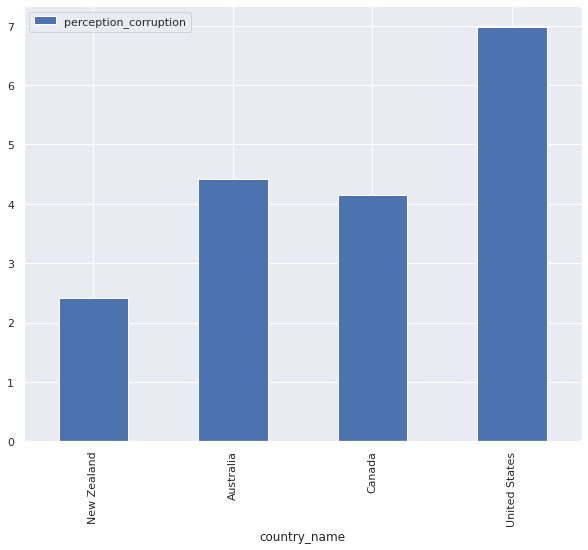

In [ ]:
d_anz.plot(x="country_name", y=["perception_corruption"], kind="bar",figsize=(10,8))
plt.show()

Part 3 - testing table 1


In [ ]:
df_temp = df1.copy()

In [ ]:
df1.set_index(['country_name', 'regional_indicator'], inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dfs = scaler.fit_transform(df1)
dfs = pd.DataFrame(data=dfs, columns=df1.columns, index=df1.index)


In [ ]:
def comp(arr):
    return sum(arr[:])

df1['country_mean'] = dfs.apply(comp, axis=1)


In [ ]:
df1.head()

,,life_ladder,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption,country_mean
country_name,regional_indicator,,,,,,,,
Finland,Western Europe,7.842,10.775,9.54,72.0,9.49,-0.98,1.86,4.910861
Denmark,Western Europe,7.620,10.933,9.54,72.7,9.46,0.30,1.79,5.066178
Switzerland,Western Europe,7.571,11.117,9.42,74.4,9.19,0.25,2.92,5.210215
Iceland,Western Europe,7.554,10.878,9.83,73.0,9.55,1.60,6.73,5.857463
Netherlands,Western Europe,7.464,10.932,9.42,72.4,9.13,1.75,3.38,5.307145


In [ ]:
df_temp['country_mean'] = df1['country_mean'].values

In [ ]:
df_temp.groupby('regional_indicator')['country_mean'].max()

regional_indicator
Central and Eastern Europe            5.289374
Commonwealth of Independent States    5.022930
East Asia                             4.878921
Latin America and Caribbean           5.112446
Middle East and North Africa          5.329741
North America and ANZ                 5.379789
South Asia                            4.827465
Southeast Asia                        5.260382
Sub-Saharan Africa                    4.757585
Western Europe                        5.857463
Name: country_mean, dtype: float64

MACHINE LEARNING

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt


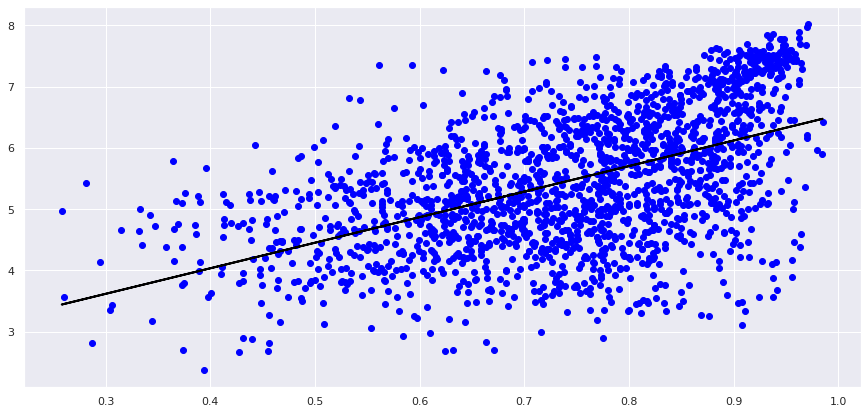

In [ ]:
dfx = df2['freedom_life_choices']
dfy = df2['life_ladder']

dfx = np.array(dfx)
dfy = np.array(dfy)

X_train = dfx
Y_train = dfy
X_train = np.array(X_train).reshape(1913,1)
Y_train = np.array(Y_train).reshape(1913,1)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

y_pred = regr.predict(X_train)

plt.scatter(X_train, Y_train,  color='blue')
plt.plot(X_train,y_pred, color='black', linewidth=2)

SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR


dfx = df1_temp[['gdp_per_capita']]

dfy = df1_temp['life_ladder']

In [ ]:
X_train ,X_test,Y_train,Y_test=train_test_split(dfx,dfy,test_size=0.20,shuffle=False)


In [ ]:
model = SVR()
model.fit(X_train,Y_train)

from sklearn.metrics import r2_score
predicts = model.predict(X_test)
print(r2_score(Y_test,predicts))

-5.367819463265195


In [ ]:
df_temp = df1.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dfs = scaler.fit_transform(df1)
dfs = pd.DataFrame(data=dfs, columns=df1.columns, index=df1.index)

def comp(arr):
    return sum(arr[:])

df1['country_mean'] = dfs.apply(comp, axis=1)

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

dfx = df1[['country_mean']]
dfy = (df1['country_mean'] > df1['country_mean'].mean())

dfx = np.array(dfx)
dfy = np.array(dfy)
X = dfx
Y = dfy

X_train ,X_test,Y_train,Y_test=train_test_split(dfx,dfy,test_size=0.20,shuffle=False)

In [ ]:

regr = linear_model.LogisticRegression()
regr.fit(X_train, Y_train)


LogisticRegression()

In [ ]:
print("Accuracy:", regr.score(X_train,Y_train))

Accuracy: 0.9747899159663865


SVC-Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

dfx = df1[['country_mean']]
dfy = (df1['country_mean'] > df1['country_mean'].mean())

dfx = np.array(dfx)
dfy = np.array(dfy)

X = dfx
Y = dfy

X_train ,X_test,Y_train,Y_test=train_test_split(dfx,dfy,test_size=0.20)

model = SVC()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

1.0

GANTI SAI SURYA ASHWIN - BL.EN.U4CSE19043<BR>
K CHAITANYA VADIRAJ - BL.EN.U4CSE19058<BR>
KISHAN MANIYAR - BL.EN.U4CSE19065